Andrew Marshall
Assignment 1
9/19/2018
Assignment Objective:  Classifying iris species using kNN.

In [1]:
# loading libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn import neighbors, datasets
import matplotlib.pyplot as plt

#Loading dataset
from sklearn.datasets import load_iris
iris_dataset = load_iris()


In [2]:
#Splits the dataset into Training sets and Test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
iris_dataset['data'], iris_dataset['target'], random_state=0)



In [3]:
#creates the algorithm for model building based on training data
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [4]:
#Generate new measurements to input into model.
#X_new = np.array([[5, 2.9, 1, 0.2]])
X_new = np.array([[10, 2.0, 5, 0.7]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


In [5]:
#Predicting which flower based on new measurements
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
iris_dataset['target_names'][prediction]))

Prediction: [2]
Predicted target name: ['virginica']


In [6]:
# Model evalution based on data not used to build the model itself
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [7]:
#Determining the acccuracy of test set
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


In [8]:
#Using cross-validation to help determine ideal neighbor value k
from sklearn.model_selection import cross_val_score

# creating odd list of K for KNN
myList = list(range(1,50))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    


The optimal number of neighbors is 7


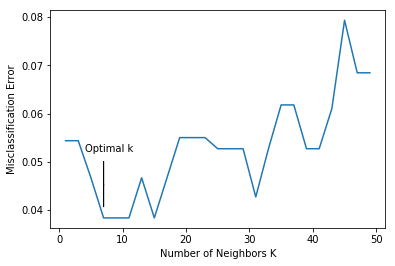

In [9]:
# changing to misclassification error
MSE =[1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
#plt.text(2, .065, r'Optimal k')
plt.text(4, .052, r'Optimal k')

#plt.arrow(7, 0.062, 0.001, -0.005)
plt.arrow(7, 0.050, 0.001, -0.005)
plt.show()

Conclusions on kNN: It seems to be a good initial option for predicting a result based on a provided dataset. The proxmity of comparable objects appear influence the result, although depending on how the comparable objects are grouped or arranged, you could end up with an erroneous prediction.  There are methods to mitigate this weakness, such has using cross-validation, as seen the last cell, it is possible to find an "Optimal k" that gives you the best chance of making a correct prediction.